In [1]:
import optuna.integration.lightgbm as lgb
import lightgbm as lgb_o
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import shap

In [2]:
p_df = pd.read_csv("./data/urshifu_pt.csv")
m_df = pd.read_csv("./data/m_urshifu.csv")
df = pd.merge(p_df,m_df,left_index=True,right_index=True)
df = df.drop(["type"+str(i) for i in range(18)],axis =1)
df.columns

Index(['H', 'A', 'B', 'C', 'D', 'S', 'label', 'type18', 'mtype0', 'mtype1',
       'mtype2', 'mtype3', 'mtype4', 'mtype5', 'mtype6', 'mtype7', 'mtype8',
       'mtype9', 'mtype10', 'mtype11', 'mtype12', 'mtype13', 'mtype14',
       'mtype15', 'mtype16', 'mtype17', 'ph', 'sp', 'sta'],
      dtype='object')

In [3]:
train_df,test_df = train_test_split(df,random_state=0)

In [4]:
train_x = train_df.drop("label",axis = 1)
train_y = train_df["label"]
test_x = test_df.drop("label",axis = 1)
test_y = test_df["label"]

In [5]:
lgb_train = lgb_o.Dataset(train_x, train_y)
lgb_eval = lgb_o.Dataset(test_x, test_y, reference=lgb_train)

In [6]:
params = {'objective': 'binary','metric': 'auc','verbosity': -1,"seed":0}

model = lgb.train(params, lgb_train, valid_sets=lgb_eval,verbose_eval=False, num_boost_round=1000, early_stopping_rounds=100)

[I 2022-01-27 12:04:23,877] A new study created in memory with name: no-name-3de1c664-554c-4c5a-8df0-5d7d357fdba7
feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
feature_fraction, val_score: 0.781275:  14%|#4        | 1/7 [00:00<00:01,  3.74it/s]'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
feature_fraction, val_score: 0.781275:  29%|##8       | 2/7 [00:00<00:01,  4.66i

In [7]:
pred_y = model.predict(test_x, num_iteration=model.best_iteration)

In [8]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y)
auc = metrics.auc(fpr, tpr)
print(auc)

0.7985864624198269


In [9]:
print('Best Params:', model.params)

Best Params: {'objective': 'binary', 'metric': 'auc', 'verbosity': -1, 'seed': 0, 'feature_pre_filter': False, 'lambda_l1': 0.0001750833184383526, 'lambda_l2': 1.632886154389476e-05, 'num_leaves': 47, 'feature_fraction': 0.5, 'bagging_fraction': 0.9692339367151841, 'bagging_freq': 7, 'min_child_samples': 20, 'num_iterations': 1000, 'early_stopping_round': 100}


In [10]:
model.save_model('./models/optunalgbm.txt')

In [11]:
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)

In [12]:
print((np.array(pred_y)>0.5).astype("int64"))

[0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1
 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1
 0]


[200 245 154 141 151 182 123 188 244 156 202 147 161 169 210 187 147 240
 223 220 218 190 192 173 167 151 167 221]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

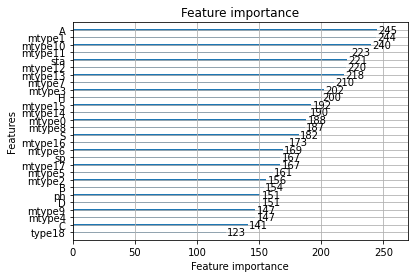

In [13]:
print(model.feature_importance())


# 特徴量の重要度をプロット
lgb.plot_importance(model)

In [14]:
from pokepoke import poke
poke_data = poke()

In [15]:
poke_data.poke_type

['ノーマル',
 'かくとう',
 'ひこう',
 'どく',
 'じめん',
 'いわ',
 'むし',
 'ゴースト',
 'はがね',
 'ほのお',
 'みず',
 'くさ',
 'でんき',
 'エスパー',
 'こおり',
 'ドラゴン',
 'あく',
 'フェアリー']

In [16]:
shap.initjs()

In [19]:
explainer = shap.TreeExplainer(model=model, feature_perturbation='tree_path_dependent', model_output = "raw")

In [20]:
shap_values = explainer.shap_values(X=test_x)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [30]:
shap_values

[array([[-0.27368149,  0.95219525,  0.09284453, ...,  0.12244717,
          0.13079386, -0.32388185],
        [ 0.84978301, -0.04568295,  0.1756586 , ...,  0.05668285,
          0.21444605, -0.07268364],
        [-0.62357548, -0.2411671 , -0.06641526, ..., -0.11915972,
         -0.31148352,  0.10344766],
        ...,
        [-0.39913971,  0.42863143,  0.04020382, ...,  0.04429606,
          0.17053019,  0.06656556],
        [-0.33334381, -0.25256438, -0.10990722, ...,  0.33890548,
          0.00736936,  0.42297684],
        [-0.26983631,  0.92698037, -0.32254315, ...,  0.24046066,
          0.03466201, -0.00696037]]),
 array([[ 0.27368149, -0.95219525, -0.09284453, ..., -0.12244717,
         -0.13079386,  0.32388185],
        [-0.84978301,  0.04568295, -0.1756586 , ..., -0.05668285,
         -0.21444605,  0.07268364],
        [ 0.62357548,  0.2411671 ,  0.06641526, ...,  0.11915972,
          0.31148352, -0.10344766],
        ...,
        [ 0.39913971, -0.42863143, -0.04020382, ..., -

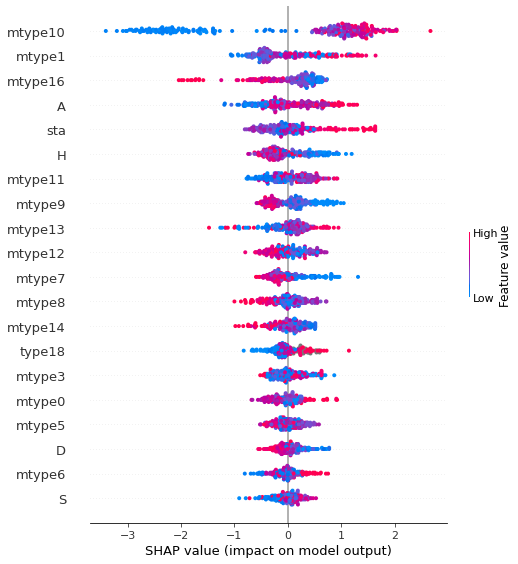

In [33]:
shap.summary_plot(shap_values[0], test_x,plot_type = "dot")

In [31]:
shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values[0], features=test_x)

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [32]:
shap.force_plot(explainer.expected_value[0], shap_values[0])